<a href="https://colab.research.google.com/github/samjurassic/datascience-demo/blob/main/education/ml_tree_incomplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus

from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from io import StringIO

In [4]:
file_url = "https://raw.githubusercontent.com/samjurassic/datascience-demo/main/education/competition_data_v2.csv"
students = pd.read_csv(file_url)

# students.describe(include="all")
students.head()

,index,borough,age,gpa,days_missed,major,full_time,freshman,first_generation,employed,pell_grant,grade
0,8548,Queens,22.056321,3.148877,2,Computer Information Systems,1,1,0,0,1,P
1,13142,Outside NYC,22.345859,2.333427,16,Computer Science,1,1,1,0,1,DWFI
2,5703,Outside NYC,25.161810,3.201160,16,Computer Information Systems,0,1,1,1,1,DWFI
3,13839,Bronx,18.302638,2.715759,2,Computer Information Systems,1,1,0,1,0,P
4,5384,Outside NYC,25.673518,2.079928,2,Computer Information Systems,1,0,1,0,1,P


In [8]:
# recode DWFI as 0, P as 1
students["outcome"] = students.grade.apply(lambda x: int(x == "DWFI"))

# create dummy variables (0, 1) for borough and major
students_full = pd.get_dummies(students, columns=["borough", "major"], drop_first=True)
# students_full.columns

#split dataset in features and target variable
feature_cols = ['age', 'gpa', 'full_time', 'freshman', 'first_generation', 'employed',
       'pell_grant', 'borough_Brooklyn', 'borough_Manhattan',
       'borough_Outside NYC', 'borough_Queens', 'borough_Staten Island',
       'major_Computer Science']

X = students_full[feature_cols] # Features
y = students_full.outcome # Target variable

# Use train_test_split to split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=15) # 70% training and 30% test

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred).round(3))

# recall:  true predicted positives/all true positives
print("Recall:", metrics.recall_score(y_test, y_pred).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred, y_true=y_test)
print(c_matrix)

Accuracy: 0.724
Precision: 0.646
Recall: 0.597
[[4234 1051]
 [1297 1918]]


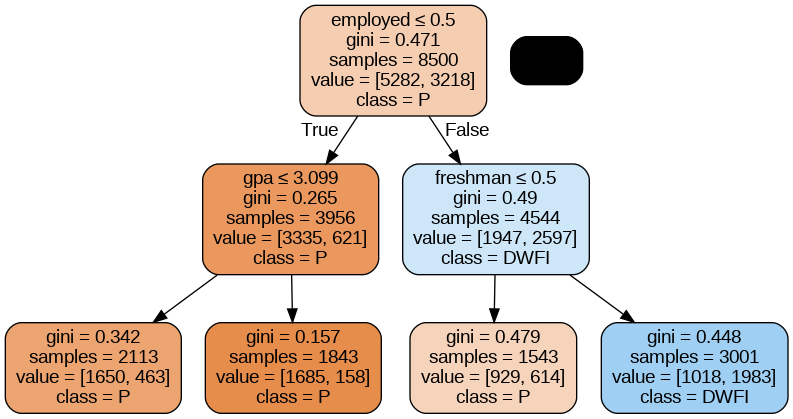

In [15]:
# graph decision tree
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['P','DWFI'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('students.png')
Image(graph.create_png())

In [16]:
### RANDOM FOREST

# Create Decision Tree classifer object
clf_rf = RandomForestClassifier(criterion="gini", max_depth=3, n_estimators=100)

# Train Decision Tree Classifer
clf_rf = clf_rf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rf = clf_rf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_rf).round(3))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred_rf).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_rf, y_true=y_test)
print(c_matrix)

Accuracy: 0.763
Precision: 0.783
Recall: 0.516
[[4826  459]
 [1557 1658]]


In [18]:
### GRADIENT BOOSTING

# Create Decision Tree classifer object
clf_gb = GradientBoostingClassifier(max_depth=3, n_estimators=300, learning_rate=0.05, verbose=True)

# Train Decision Tree Classifer
clf_gb = clf_gb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gb = clf_gb.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gb).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_gb).round(3))

# recall:  true predicted positives/all true positives
print("Recall:", metrics.recall_score(y_test, y_pred_gb).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_gb, y_true=y_test)
print(c_matrix)

      Iter       Train Loss   Remaining Time 
         1           1.3011           24.52s
         2           1.2781           23.74s
         3           1.2571           23.05s
         4           1.2379           21.86s
         5           1.2199           18.64s
         6           1.2037           16.48s
         7           1.1884           15.94s
         8           1.1746           15.78s
         9           1.1615           16.79s
        10           1.1497           16.85s
        20           1.0648           12.47s
        30           1.0153           10.25s
        40           0.9817            8.91s
        50           0.9567            7.82s
        60           0.9383            7.15s
        70           0.9237            6.46s
        80           0.9124            5.92s
        90           0.9033            5.42s
       100           0.8960            5.01s
       200           0.8582            2.13s
       300           0.8394            0.00s
Accuracy:

In [19]:
### Compare AUC

## NOTE: You need predicted probabilities to do this - not predicted classes

print(f"Decision tree: {round(metrics.roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]), 4)}")
print(f"Random forest: {round(metrics.roc_auc_score(y_test, clf_rf.predict_proba(X_test)[:,1]), 4)}")
print(f"Gradient boosting: {round(metrics.roc_auc_score(y_test, clf_gb.predict_proba(X_test)[:,1]), 4)}")


Decision tree: 0.7597
Random forest: 0.8421
Gradient boosting: 0.8564


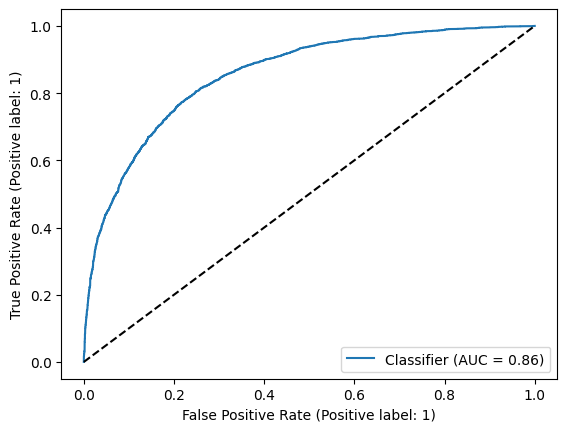

In [21]:
# Plot the ROC curve
display = metrics.RocCurveDisplay.from_predictions(
    y_true=y_test,
    y_pred=clf_gb.predict_proba(X_test)[:,1]
)

# plot the dashed line to show a random model (BAD, as if coin flip)
plt.plot([0, 1], [0, 1], 'k--', label='Random classifier')

In [24]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
import numpy as np

param_grid = {
    # "loss":["log_loss", "exponential"],
    "max_depth":[6, 3],
    "learning_rate": [0.01, 0.05],
    "subsample":[0.10, 0.2],
    "n_estimators":[100, 200]
    # "min_samples_split": np.linspace(0.1, 0.5, 12),
    # "min_samples_leaf": np.linspace(0.1, 0.5),
    # "max_features":["log2","sqrt"],
    # "criterion": ["friedman_mse",  "mae"],

    }

gbt = GradientBoostingClassifier(random_state=8, verbose=False)

# cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

search = GridSearchCV(estimator=gbt, param_grid=param_grid, scoring="roc_auc", cv=None)
search.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(random_state=8,
                                                  verbose=False),
             param_grid={'learning_rate': [0.01, 0.05], 'max_depth': [6, 3],
                         'n_estimators': [100, 200], 'subsample': [0.1, 0.2]},
             scoring='roc_auc')

In [25]:
results_df = pd.DataFrame(search.cv_results_)
results_df = results_df.sort_values(by=["rank_test_score"])

# pd.concat([results_df.drop(columns="params"), results_df["params"].apply(pd.Series)])
print(search.best_params_)

# results_df = results_df.set_index(
#     results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))
# ).rename_axis("kernel")
results_df[["param_learning_rate", "param_max_depth", "param_n_estimators", "param_subsample", "rank_test_score", "mean_test_score", "std_test_score"]]

{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.2}


,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,rank_test_score,mean_test_score,std_test_score
13,0.05,3,100,0.2,1,0.853257,0.003803
15,0.05,3,200,0.2,2,0.852155,0.002857
12,0.05,3,100,0.1,3,0.852097,0.002145
3,0.01,6,200,0.2,4,0.850822,0.003272
2,0.01,6,200,0.1,5,0.849866,0.003384
14,0.05,3,200,0.1,6,0.849556,0.003651
1,0.01,6,100,0.2,7,0.849003,0.004416
6,0.01,3,200,0.1,8,0.848805,0.004265
0,0.01,6,100,0.1,9,0.847727,0.003779
9,0.05,6,100,0.2,10,0.846903,0.003534


In [31]:
### GRADIENT BOOSTING

# Create Decision Tree classifer object
clf_gb = GradientBoostingClassifier(**search.best_params_)

# Train Decision Tree Classifer
clf_gb = clf_gb.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_gb = clf_gb.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_gb).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_gb).round(3))

# recall:  true predicted positives/all true positives
print("Recall:", metrics.recall_score(y_test, y_pred_gb).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_gb, y_true=y_test)
print(c_matrix)

print(f"Gradient boosting: {round(metrics.roc_auc_score(y_test, clf_gb.predict_proba(X_test)[:,1]), 4)}")

Accuracy: 0.785
Precision: 0.742
Recall: 0.662
[[4545  740]
 [1088 2127]]
Gradient boosting: 0.8568


In [28]:
param_grid_rf = {
    "max_depth":[2, 5],
    "n_estimators":[100, 400],
    "min_impurity_decrease": [0.01, 0.03],
    # "min_samples_split": np.linspace(0.1, 0.5, 12),
    # "min_samples_leaf": np.linspace(0.1, 0.5),
    # "max_features":["log2","sqrt"],
    # "criterion": ["friedman_mse",  "mae"],
}

rf_grid = RandomForestClassifier(criterion="gini", random_state=8)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=0)

search_rf = GridSearchCV(estimator=rf_grid, param_grid=param_grid_rf, scoring="roc_auc", cv=cv)
search_rf.fit(X_train, y_train)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=1, n_splits=5, random_state=0),
             estimator=RandomForestClassifier(random_state=8),
             param_grid={'max_depth': [2, 5],
                         'min_impurity_decrease': [0.01, 0.03],
                         'n_estimators': [100, 400]},
             scoring='roc_auc')

In [29]:
results_rf = pd.DataFrame(search_rf.cv_results_)
results_rf = results_rf.sort_values(by=["rank_test_score"])

print(search_rf.best_params_)

results_rf[["param_min_impurity_decrease", "param_max_depth", "param_n_estimators", "rank_test_score", "mean_test_score", "std_test_score"]]

{'max_depth': 2, 'min_impurity_decrease': 0.01, 'n_estimators': 100}


,param_min_impurity_decrease,param_max_depth,param_n_estimators,rank_test_score,mean_test_score,std_test_score
0,0.01,2,100,1,0.829808,0.006815
1,0.01,2,400,2,0.828999,0.007842
4,0.01,5,100,3,0.828488,0.006488
5,0.01,5,400,4,0.827994,0.007891
7,0.03,5,400,5,0.755625,0.038187
3,0.03,2,400,6,0.752861,0.035497
2,0.03,2,100,7,0.746215,0.028565
6,0.03,5,100,7,0.746215,0.028565


<Axes: xlabel='param_max_depth', ylabel='mean_test_score'>

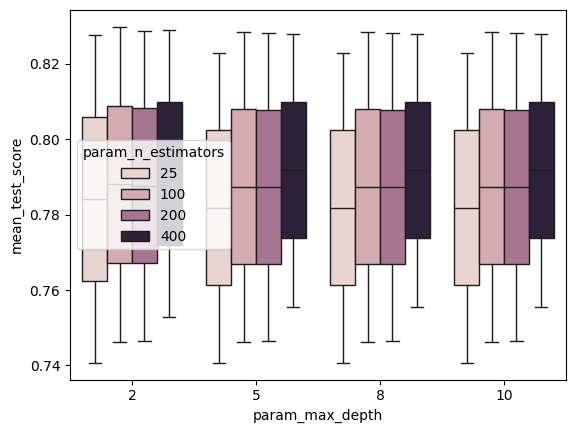

In [ ]:
sns.boxplot(results_rf, x="param_max_depth", y="mean_test_score", hue="param_n_estimators")

In [ ]:
### RANDOM FOREST

# Create Decision Tree classifer object
clf_rf = RandomForestClassifier(**search_rf.best_params_)

# Train Decision Tree Classifer
clf_rf = clf_rf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_rf = clf_rf.predict(X_test)

### EVALUATE THE MODEL

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf).round(3))

# precision: true predicted positives/all predicted positives
print("Precision:", metrics.precision_score(y_test, y_pred_rf).round(3))

# recall:  true predicted positives/all true positives
print("Recall:",metrics.recall_score(y_test, y_pred_rf).round(3))

# Confusion Matrix
c_matrix = metrics.confusion_matrix(y_pred=y_pred_rf, y_true=y_test)
print(c_matrix)

Accuracy: 0.714
Precision: 0.841
Recall: 0.3
[[5103  182]
 [2249  966]]


In [30]:
def get_comp_test_data():

  comp_test_fn = "https://raw.githubusercontent.com/samjurassic/datascience-demo/main/education/competition_data_test_v2.csv"

  comp_test = pd.read_csv(comp_test_fn, index_col="index")

  # create dummy variables (0, 1) for borough and major
  comp_full = pd.get_dummies(comp_test, columns=["borough", "major"], drop_first=True)
  # students_full.columns

  #split dataset in features and target variable
  feature_cols = ['age', 'gpa', 'full_time', 'freshman', 'first_generation', 'employed',
        'pell_grant', 'borough_Brooklyn', 'borough_Manhattan',
        'borough_Outside NYC', 'borough_Queens', 'borough_Staten Island',
        'major_Computer Science']

  return comp_full

comp_X = get_comp_test_data()

def make_predictions_df(model, X, features):
  probs = model.predict_proba(X[features])[:,1]
  return pd.DataFrame(probs, index=X.index.values, columns=["outcome"])

output_df = make_predictions_df(clf_rf, comp_X, feature_cols)

# check output
assert len(output_df) == 17000
assert output_df.index[-1] == 16998
assert output_df.columns[0] == "outcome"

output_df.to_csv("sam_predictions_rf2.csv", index=True)